```{image} ncpi-logo.svg
:height: 75px
:class: analytics-logo
```

# NCPI Portal User Analytics - July vs June 2022

This section displays metrics collected from Google Analytics for the NCPI Portal at https://anvilproject.org/ncpi and compares July 2022 with the previous month (June 2022). The generation of this report is now coded in Jupyter notebooks and can be rerun easily and modified or consolidated as desired.

### Key to tables

On the tables:

* Diffs, e.g. <span style="color: green">(+19.04%)</span> or <span style="color: red">(-12.03%)</span>, compare the later month with the previous month.
* "+" Indicates the entry is new in the report in the current month.
* "↑" Indicates the entry has moved up in rank since the last month.
* "↓" Indicates the entry has moved down in rank since the last month.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install google_auth_oauthlib 
# !pip install install google-api-python-client
# !pip install pandas 
# !pip install numpy
# !pip install matplotlib
# !pip install google-cloud-bigquery
# !pip install db-dtypes

# Analytics package:
# !pip install -e "git+https://github.com/DataBiosphere/data-browser.git@f40554c0f604e1430501fb0d9b9422e73d0eb8c1#egg=analytics&subdirectory=analytics/hdgar-book/analytics_package"

In [39]:
from IPython.display import display
import analytics.charts as ac

%load_ext autoreload
%autoreload 2

import analytics_ncpi as ncpi

GA_PROPERTY = "207946923" # AnVIL portal
ANALYTICS_START = "2020-02-01"
TODAY = 'today'
PERIOD = "2022-07"
PREV_PERIOD = "2022-06"
NCPI_FILTER = "ga:pagePath=~^\\/ncpi(?:\\/|$)"

default_params = {
    "property": GA_PROPERTY,
    "index_key_formatter": ncpi.adjust_table_index_key,
    "period": PERIOD,
    "prev_period": PREV_PERIOD,
    "segment": "gaid::eDokyxviRSG9BnFaFbHPFw"
}

ac.authenticate_ga('ANVIL_ANALYTICS_REPORTING_CLIENT_SECRET_PATH')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=526897014808-dq9pt3bmnutqqjdvj1f5roflpgcvqmpt.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&state=G8dUjLsLFz5ZTo4Zr7NTq1ABSXHTcN&access_type=offline


In [4]:
ac.init_tables()

## Monthly Users and Page Views (All Time)

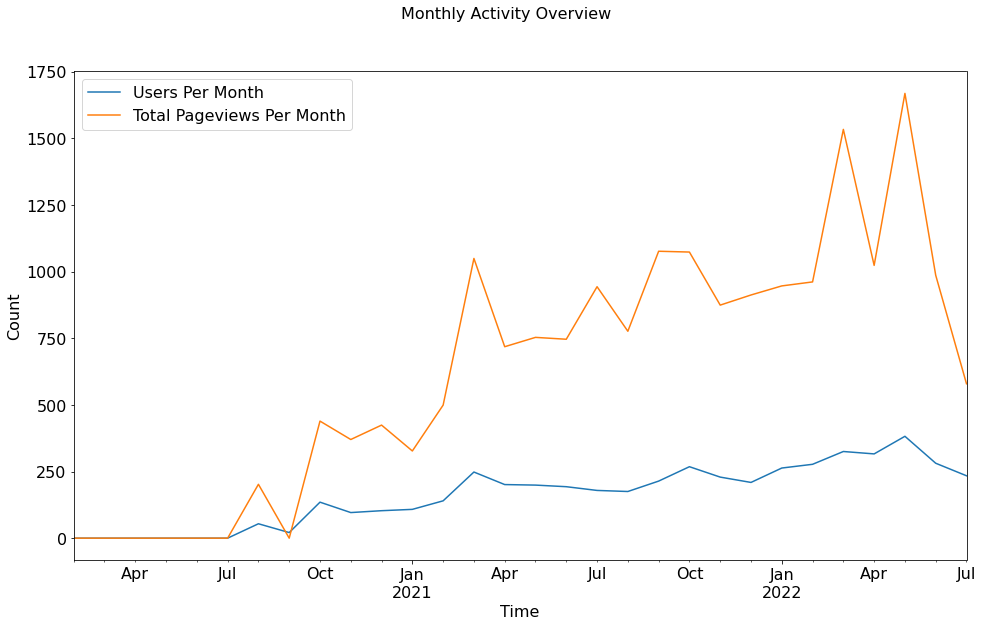

In [5]:
users_over_time_table = ncpi.plot_users_over_time(NCPI_FILTER, start_date=ANALYTICS_START, end_date=TODAY, **default_params)

In [6]:
display(users_over_time_table)

## Users and Sessions
Users are distinguished based on a tracking cookie set by Google. Because cookies may not remain present over time or between devices, it's likely that total users are overcounted and returning users are undercounted.

In [7]:
ac.show_difference_table("Total Users", None, "ga:users", None, **default_params)

In [8]:
ac.show_difference_table("Returning Users", None, "ga:users", None, filters="ga:userType==Returning Visitor", **default_params)

In [9]:
ac.show_difference_table("Total Visits", None, "ga:sessions", None, **default_params)

<div style="page-break-after: always"></div>

## Page Views

In [10]:
ac.show_difference_table("Total", None, "ga:pageviews", None, filters=NCPI_FILTER, **default_params)

## Top Referrers

### By Referring Host

In [11]:
ac.show_difference_table("User Sessions", "Source Host", "ga:sessions", "ga:source", **default_params)

<div style="page-break-after: always"></div>

### By Full Referrer

In [12]:
ac.show_difference_table("User Sessions", "Source", "ga:sessions", "ga:fullReferrer", **default_params)

## Social Network Referrers

In [13]:
ac.show_difference_table("User Sessions", "Social Network", "ga:sessions", "ga:socialNetwork", **default_params)

## Device Category

In [15]:
ac.show_difference_table(["Users", "Percentage of users"], "Category", "ga:users", "ga:deviceCategory", percentage_metrics={"ga:users"}, **default_params)

<div style="page-break-after: always"></div>

## Top Countries

In [14]:
ac.show_difference_table("Users", "Country", "ga:users","ga:country", **default_params)

<div style="page-break-after: always"></div>

## Top Pages

In [40]:
ac.show_difference_table("Page Views", "Page", "ga:pageviews", "ga:pagePath", filters=NCPI_FILTER, **default_params)

<div style="page-break-after: always"></div>

## Top Landing Pages

In [17]:
ac.show_difference_table("Entrances", "Page", "ga:entrances","ga:pagePath", filters=NCPI_FILTER, **default_params)

<div style="page-break-after: always"></div>

## Outbound Links to Terra
### Terra Login

In [32]:
ac.show_difference_table("Count", "URL", "ga:hits", "ga:dimension3", filters="ga:dimension3=~^https://anvil.terra.bio/(?:\\#workspaces)?$" + ";" + NCPI_FILTER, **default_params)

### Terra Workspaces
The following Terra workspaces were navigated to from the AnVIL portal.

In [33]:
ac.show_difference_table("Count", "Workspace", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Workspace" + ";" + NCPI_FILTER, **default_params)

## Outbound Links to dbGap
### Top Studies

In [20]:
ac.show_difference_table("Count", "Study ID", "ga:hits", "ga:eventLabel", filters="ga:dimension1==Study;ga:eventLabel=~^phs" + ";" + NCPI_FILTER, **default_params)

## Outbound Links to Dockstore
### Links to Dockstore Organization Page

In [21]:
ac.show_difference_table("Count", "URL", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension3==https://dockstore.org/organizations/anvil" + ";" + NCPI_FILTER, **default_params)

### Top References

In [22]:
ac.show_difference_table("Count", "URL", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Reference;ga:dimension2==Dockstore" + ";" + NCPI_FILTER, **default_params)

## Outbound Links to Gen3
### Links to Gen3 Data Browser

In [23]:
ac.show_difference_table("Count", "URL", "ga:hits", "ga:dimension3", filters="ga:eventCategory==External Link;ga:dimension3==https://gen3.theanvil.io/" + ";" + NCPI_FILTER, **default_params)

## Outbound Links to Tools

In [34]:
ac.show_difference_table("Count", "Tool", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Tool" + ";" + NCPI_FILTER, **default_params)

## Outbound Links to General Resources (NIH/NHGRI)

In [35]:
ac.show_difference_table("Count", ["NIH/NHGRI", "URL"], "ga:hits", ["ga:dimension2", "ga:dimension3"], filters="ga:eventCategory==External Link;ga:dimension1==Reference;ga:dimension2=~NIH|NHGRI" + ";" + NCPI_FILTER, **default_params)

## Outbound Links to Data Consortia

In [36]:
ac.show_difference_table("Count", "Consortia", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Data Consortium" + ";" + NCPI_FILTER, **default_params)

## Video Views

In [27]:
ac.show_difference_table("Count", "Video", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Video;ga:eventAction==start" + ";" + NCPI_FILTER, rows_limit=25, **default_params)

## Data Dashboard
### Top Facet Terms

In [28]:
ac.show_difference_table("Count", ["Term Name", "Facet"], "ga:hits", ["ga:eventLabel", "ga:dimension5"], filters="ga:eventCategory==Search;ga:eventAction==Select" + ";" + NCPI_FILTER, **default_params)

### Top Text Searches

In [29]:
ac.show_difference_table("Count", "Text Input", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Search;ga:eventAction==Enter Text;ga:eventLabel=~.{3\\,}" + ";" + NCPI_FILTER, **default_params)

<div style="page-break-after: always"></div>

## Site Search
### Top Text Searches

In [30]:
ac.show_difference_table("Count", "Text Input", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Site Search;ga:eventAction==Search;ga:eventLabel=~.{3\\,}" + ";" + NCPI_FILTER, **default_params)

### Top Search Click Throughs

In [31]:
ac.show_difference_table("Count", "Clicked Search Result", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Site Search;ga:eventAction==Select Search Result" + ";" + NCPI_FILTER, **default_params)